# Modelaje y mejora de procesos 2023-2 - Módulo de Simulación

Departamento de Ingeniería Industrial

Universidad de los Andes

## Tarea 1 - Análisis de entrada

### 1. Cargue los datos en un cuaderno de Jupyter.

Generación de muestras de una variable aleatoria normal usando numpy.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import gamma
import statsmodels.api as sm
import scipy.stats as stats

df=pd.read_csv('consumo_hamb.csv', header=None)
df

,0
0,490.40
1,708.02
2,559.67
3,605.58
4,529.02
...,...
249,514.96
250,794.97
251,634.73
252,514.59


### 2. Realice un análisis exploratorio: incluya por lo menos estadísticas descriptivas (media,desviación estándar, cuantiles, asimetría, kurtosis), diagramas de caja e histogramas.

Cálculo de estadísticas usando pandas.

In [27]:
df.describe()

,0
count,254.000000
mean,588.762283
std,105.002327
min,300.480000
25%,519.870000
50%,597.280000
75%,659.220000
max,865.790000


In [14]:
kurtosis=df[0].kurt()
kurtosis

-0.37258628059755416

In [15]:
asimetria=df[0].skew()
asimetria

-0.14440590179260407

Generación de boxplot usando matplotlib.

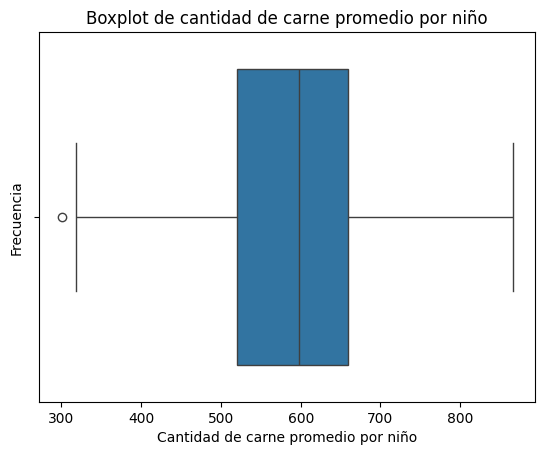

In [16]:
sns.boxplot(x=df[0])
plt.title('Boxplot de cantidad de carne promedio por niño')
plt.xlabel('Cantidad de carne promedio por niño')
plt.ylabel('Frecuencia')
plt.show()

Generación de histograma usando matplotlib.

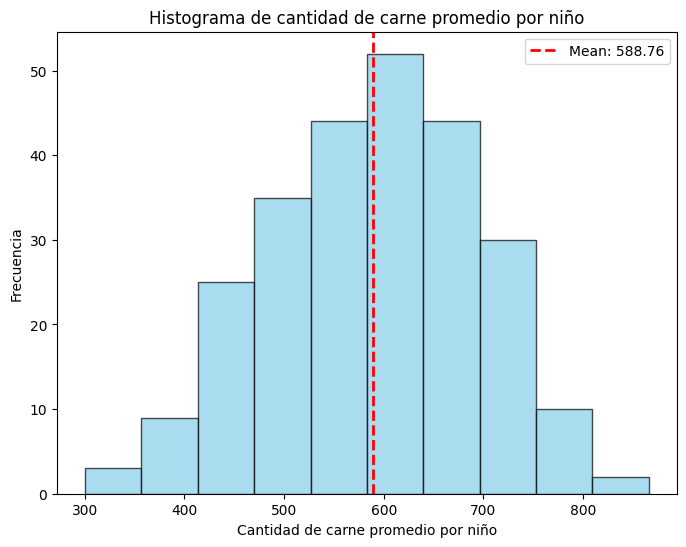

In [30]:
plt.figure(figsize=(8, 6))
plt.hist(df[0], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histograma de cantidad de carne promedio por niño')
plt.xlabel('Cantidad de carne promedio por niño')
plt.ylabel('Frecuencia')

# Calculate the mean
mean_value = np.mean(df[0])

# Display the mean value on the graph
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()

# Show the plot
plt.show()

### 3. Resuma brevemente sus hallazgos.


Nuestros datos tienen una media de 588 y desviación estandar de 105, esto nos indican que la mayoria de los valores esta mas o menos 1/6 alejado de nuestra media que en general esta bastante bien, tambien viendo el valor de la kurtosis vemos que las colas de la distribución son menos pesadas o que en general hay menos valores atipicos a comparacion a una normal, y la asimetria negativa nos dice que la cola izquierda de la distribucion es un poco mas larga, en general los datos se agrupan un poco mas hacia el lado derecho de la media.

### 4. Utilice un QQplot y el histograma de los datos contra el modelo propuesto para poner a prueba dos hipótesis:
#### a) Sus datos siguen una distribución normal. Emplee la media y desviación estándar muestral para parametrizar el modelo.

Densidad normal estándar.

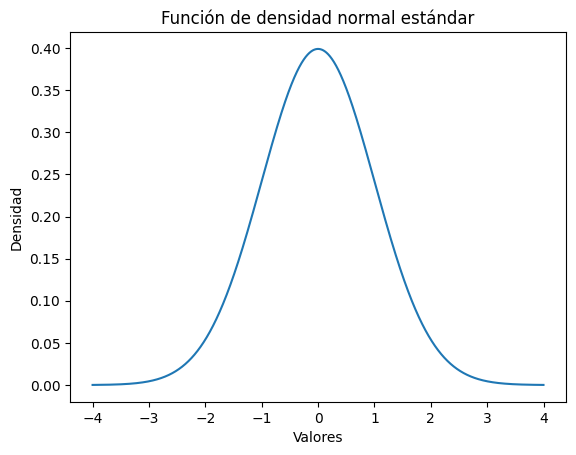

In [18]:
# Normal (mu=0, sigma=1)
x= np.arange(-4,4,0.001)
plt.plot(x, norm.pdf(x))
plt.title('Función de densidad normal estándar')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.show()


Densidad normal con media muestral y desviación estándar muestral.

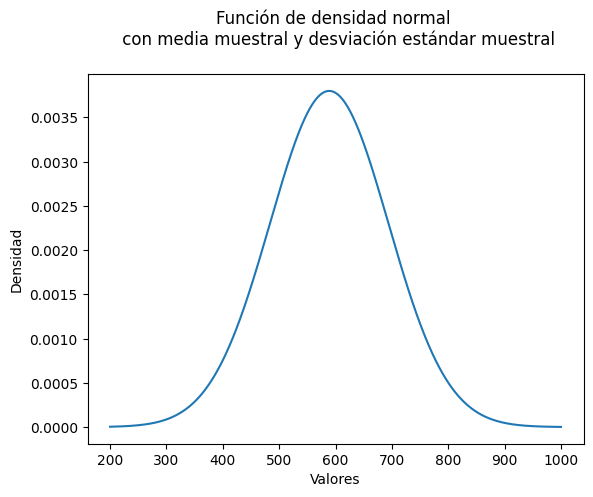

In [19]:
x= np.arange(200,1000,0.01)
plt.plot(x, norm.pdf(x,loc=df[0].mean(),scale=df[0].std()))
plt.title('Función de densidad normal \n con media muestral y desviación estándar muestral\n')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.show()

QQ plot usando statsmodels. 

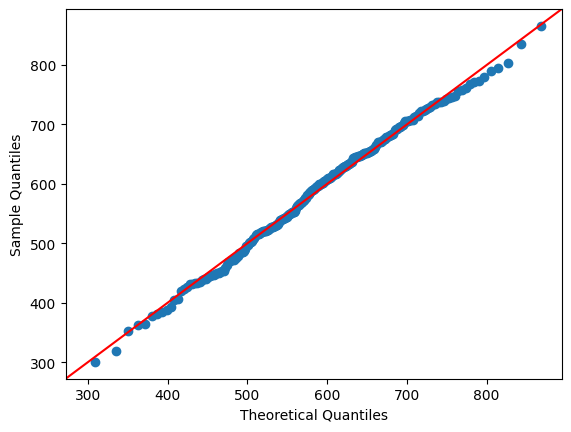

In [20]:
fig = sm.qqplot(data = df[0], dist=stats.norm, loc=df[0].mean(), scale=df[0].std(), line="45")
plt.show()

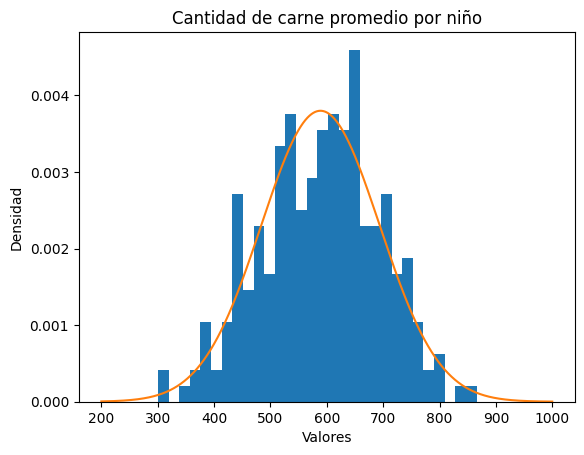

In [21]:
# histograma
count, bins, ignored = plt.hist(x=df[0], bins=30, density=True)

# densidad normal(media muestral, std muestral)
x= np.arange(200,1000,0.01)
plt.plot(x, norm.pdf(x,loc=df[0].mean(),scale=df[0].std()))

plt.title('Cantidad de carne promedio por niño')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.show()

#### b) Sus datos siguen una distribución Gamma. Esta distribución se puede definir con dos parámetros: α y β. Su relación con la media $\mu$ y la varianza $\sigma^2$ es la siguiente:
$$\mu =\alpha/\beta \text{ , } \sigma^2 =\alpha/\beta^2$$

31.439969646160826
0.053400108208617875


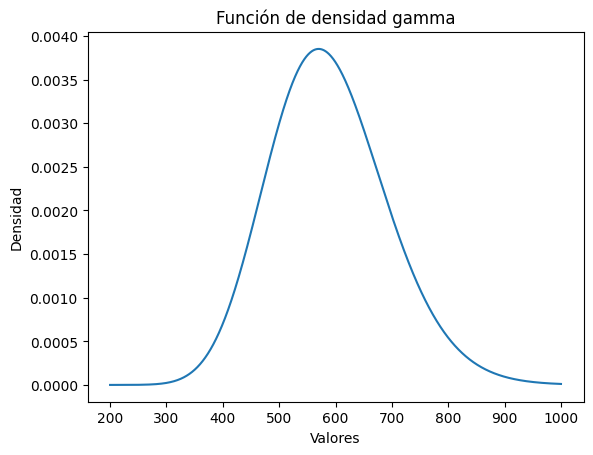

In [22]:
alpha=df[0].mean()**2/df[0].std()**2
beta=df[0].mean()/df[0].std()**2

print(alpha)
print(beta)

x= np.arange(200,1000,0.01)
plt.plot(x, gamma.pdf(x,a=alpha, scale=1/beta))
plt.title('Función de densidad gamma')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.show()

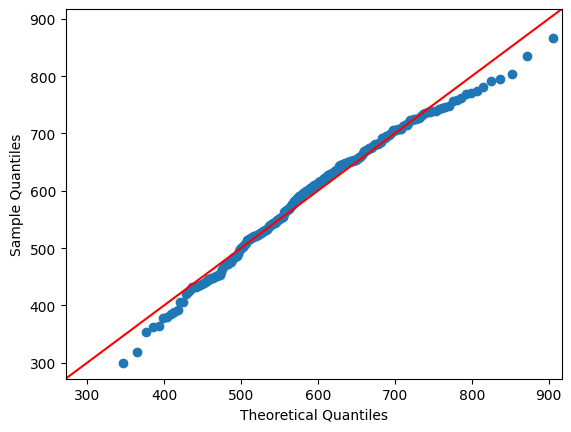

0      490.40
1      708.02
2      559.67
3      605.58
4      529.02
        ...  
249    514.96
250    794.97
251    634.73
252    514.59
253    440.39
Name: 0, Length: 254, dtype: float64

In [24]:
fig = sm.qqplot(data = df[0], dist=stats.gamma, distargs=(alpha,),scale=1/beta, line="45")
plt.show()
df[0]

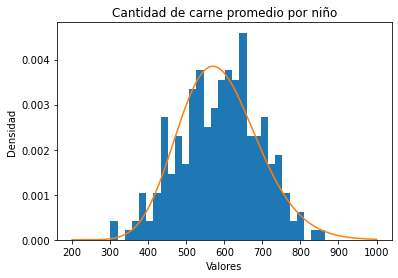

In [66]:
# histograma
count, bins, ignored = plt.hist(x=df[0], bins=30, density=True)

# densidad gamma(alpha, 1/beta)
x= np.arange(200,1000,0.01)
plt.plot(x, gamma.pdf(x,a=alpha, scale=1/beta))

plt.title('Cantidad de carne promedio por niño')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.show()

### 5. Comente sus hallazgos y concluya sobre las hipótesis propuestas.

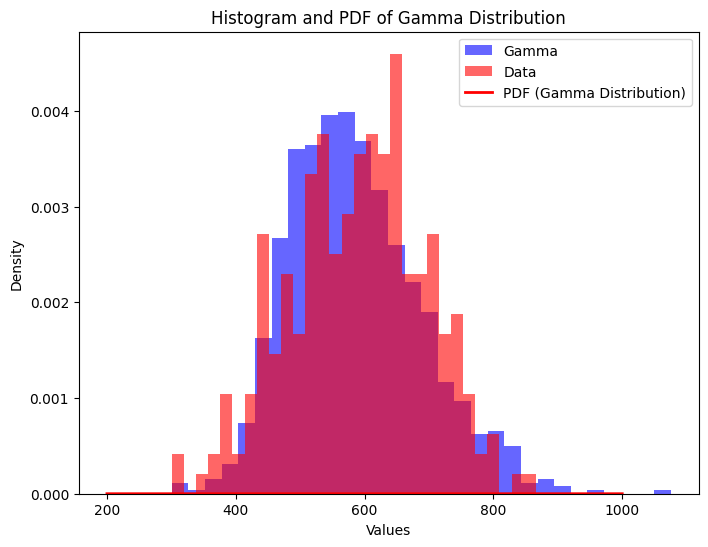

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Genera datos desde una distribución gamma
data = np.random.gamma(alpha, scale=1/beta, size=1000)

# Crear histograma de tus datos
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='b', label='Gamma')
plt.hist(df[0], bins=30, density=True, alpha=0.6, color='r', label='Data')

# Crea una PDF (Función de Densidad de Probabilidad) para la distribución gamma
x= np.arange(200,1000,0.01)
pdf = stats.gamma.pdf(x, a=alpha, scale=beta)
plt.plot(x, pdf, 'r-', lw=2, label='PDF (Gamma Distribution)')

plt.title('Histogram and PDF of Gamma Distribution')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.show()


1.**Cuantiles con una distribución normal y Distribución gamma**: Queremos determinar si nuestros datos se ajustan mejor a una distribución normal o a una distribución gamma con parámetros $\mu = \frac{\alpha}{\beta}$ y $\sigma^2 = \frac{\alpha}{\beta^2}$. Al examinar las estadísticas descriptivas de nuestros datos, notamos que la kurtosis y la asimetría son negativas. Para abordar esta asimetría, optamos por ajustar una distribución gamma, que nos brinda la flexibilidad de ajustar la asimetría y, en general, permite agrupar los datos de manera más efectiva en la parte izquierda de la distribución.

2.**Comparación de Cuantiles**: Al comparar los cuantiles de nuestros datos ajustados a una distribución gamma con los cuantiles de una distribución normal, observamos que los cuantiles de tipo normal se adaptan mejor a nuestros datos. Esto sugiere que, a pesar de la flexibilidad que ofrece la distribución gamma para abordar la asimetría, nuestros datos muestran una mayor concordancia con una distribución normal en términos de cuantiles.

